https://gist.github.com/emiliom/35db17392c5d652faeb2

## Accessing a "NERRS" station with Pyoos via its [HADS Collector](https://github.com/ioos/pyoos/tree/master/pyoos/collectors/hads), not the CDMO
Currently it only illustrates a request for a station ("feature") given its known station_code (nesdis_id); no other type of collection query is illustrated. Then, it shows access to data from the specified station; extraction of station metadata; and conversion of the returned multi-variable time series to a pandas DataFrame, followed by a time series plot from the DataFrame. 2014 June 18. Emilio Mayorga.

In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from pyoos.collectors.hads.hads import Hads

/usr/anaconda/anaconda/envs/ioos_em_13/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [2]:
# FROM pyoos SOS handling
# Convenience function to build record style time series representation
# Test for string NaN added for HADS collector. Ideally the change should be
# made in pyoos, on the HADS parser so 'values' returns floats or np.nan
def flatten_element(p):
    rd = {'time':p.time}
    for m in p.members:
        rd[m['standard']] = float(m['value']) if m['value'] != 'NaN' else np.nan
        #rd[m['standard']] = m['value']
    return rd

# sta.get_unique_members() serves the same function as the pyoos SOS get_unique_members method
# Convenience function to extract a dict of unique members (observed properties) by standard name
obsprops_bystdname = lambda sta: {m['standard']:m for m in sta.get_unique_members()}

In [3]:
# Not used, for now
#states_url = "http://amazon.nws.noaa.gov/hads/charts/OR.html"

In [4]:
hadsData = Hads()

In [5]:
# Access South Slough North Spit station, for the last 2 days (roughly)
#hadsData.filter(features=['346F229A'],
#                  start=datetime.utcnow() - timedelta(days=2),
#                  end=datetime.utcnow()  - timedelta(hours=12))

In [6]:
#hadsData.filter(features=['346F229A'], states_url=states_url)
#hadsData.filter(states_url=states_url)
# NOT CLEAR YET IF THIS FILTER IF ALSO NEEDED, 
# OR IF SETTING hadsData.station_codes IS ENOUGH
hadsData.filter(features=['346F229A'])

In [7]:
hadsData.station_codes = ['346F229A']

In [8]:
hadsData.metadata_url, hadsData.obs_retrieval_url, hadsData.states_url

('http://amazon.nws.noaa.gov/nexhads2/servlet/DCPInfo',
 'http://amazon.nws.noaa.gov/nexhads2/servlet/DecodedData',
 'http://amazon.nws.noaa.gov/hads/goog_earth/')

In [9]:
respCollect = hadsData.collect()

In [10]:
len(respCollect.elements)

1

In [11]:
sta = respCollect.elements[0]
obsprops_bystdname_dict = obsprops_bystdname(sta)

In [12]:
print sta.get_location()
sta._properties

POINT Z (-123.7211111111111 43.41388888888889 0)


{'channel': u'34  ',
 'country': 'USA',
 'horizontal_crs': 'EPSG:4326',
 'hsa': u'MFR',
 'init_transmit': u'000930',
 'location_description': u'NERRS WATER QUALITY SITE AT SOUTH SLOUGH NORTH SPIT NEAR NORTH BEND 2WNW (CTCLUSI)',
 'manufacturer': u'SU',
 'owner': u'NOAERD',
 'state': u'OR',
 'vertical_crs': None,
 'vertical_units': 'ft'}

In [13]:
obsprops_bystdname_dict.keys(), obsprops_bystdname_dict['dissolved_oxygen']

(['sea_water_temperature',
  'dissolved_oxygen_saturation',
  'water_level',
  'dissolved_oxygen',
  'battery_voltage',
  'salinity',
  'sea_water_ph_reported_on_total_scale',
  'sea_water_electrical_conductivity',
  'turbidity'],
 {'description': '',
  'name': 'Dissolved Oxygen',
  'standard': 'dissolved_oxygen',
  'unit': 'ppm'})

In [14]:
flattenedsta_0 = map(flatten_element, sta.elements)
sta_0df = pd.DataFrame.from_records(flattenedsta_0, index=['time'])
sta_0df.head()

,battery_voltage,dissolved_oxygen,dissolved_oxygen_saturation,salinity,sea_water_electrical_conductivity,sea_water_ph_reported_on_total_scale,sea_water_temperature,turbidity,water_level
time,,,,,,,,,
2014-06-11 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.39
2014-06-11 01:30:00,13.9,8.33,97.1,29.63,45.72,7.66,57.18,2.2,13.62
2014-06-11 01:45:00,13.9,8.45,98.8,29.43,45.43,7.71,57.61,2.5,13.91
2014-06-11 02:00:00,13.9,8.31,96.4,29.83,46.01,7.70,56.71,3.0,14.24
2014-06-11 02:15:00,13.8,8.48,98.1,30.07,46.35,7.73,56.30,3.4,14.53


In [15]:
#hadsData._get_metadata(['346F229A'])
# ---------------------------------
#respMeta, respRawdata = hadsData.raw()
#respMeta
#Out[]: u'|346F229A|SSNO3|NERRS WATER QUALITY SITE AT SOUTH SLOUGH NORTH SPIT NEAR NORTH BEND 2WNW (CTCLUSI)|43 24 50|-124 16 44|MFR|OR|NOAERD|SU|34  |000930|60|TW|15,-9|0.018,-9|32.0|9|0.0|0.0|WC|15,-9|0.01,-9|0.0|9|0.0|0.0|WS|15,-9|0.01,-9|0.0|9|0.0|0.0|WX|15,-9|0.01,-9|0.0|9|0.0|0.0|WO|15,-9|0.01,-9|0.0|9|0.0|0.0|HM|15,-9|0.03281,-9|0.0|9|0.0|0.0|WP|15,-9|0.01,-9|0.0|9|0.0|0.0|WT|15,-9|0.01,-9|0.0|9|0.0|0.0|VB|15,-9|0.01,-9|0.0|9|0.0|0.0|\r\n'

In [16]:
# Time series plot.
obsprop_name = 'sea_water_temperature'
obsprop = obsprops_bystdname_dict[obsprop_name]
#sta_0df[obsprop_name].plot()
#ylabel(obsprop_name + ' ('+obsprop['unit']+')');
# THE VARIABLE COLUMNS ARE NOT NUMERIC (PROBABLY DUE TO THE 'NaN' values),
# SO .plot() RETURNS AN ERROR.
# 6/18/2014. I've fixed flatten_elements() to handle this, and it now works!

In [17]:
sta_0df.shape

(732, 9)

In [18]:
sta_0df.dtypes

battery_voltage                         float64
dissolved_oxygen                        float64
dissolved_oxygen_saturation             float64
salinity                                float64
sea_water_electrical_conductivity       float64
sea_water_ph_reported_on_total_scale    float64
sea_water_temperature                   float64
turbidity                               float64
water_level                             float64
dtype: object

In [19]:
sta_0df.tail()

,battery_voltage,dissolved_oxygen,dissolved_oxygen_saturation,salinity,sea_water_electrical_conductivity,sea_water_ph_reported_on_total_scale,sea_water_temperature,turbidity,water_level
time,,,,,,,,,
2014-06-18 15:00:00,13.8,9.41,108.7,30.92,47.53,7.82,55.76,4.0,14.08
2014-06-18 15:15:00,14.4,8.92,104.1,30.16,46.46,7.77,57.02,3.2,13.62
2014-06-18 15:30:00,14.5,8.83,103.2,30.03,46.27,7.74,57.27,3.6,13.22
2014-06-18 15:45:00,13.8,8.74,102.4,29.95,46.16,7.75,57.47,2.4,12.80
2014-06-18 16:00:00,13.8,8.76,102.7,29.93,46.13,7.74,57.56,3.0,12.30


In [20]:
len(sta.elements), type(sta.elements[0])

(732, paegan.cdm.dsg.features.base.point.Point)

In [21]:
stael0 = sta.elements[0]
stael0.members

[{'description': '',
  'name': 'Water Level',
  'standard': 'water_level',
  'unit': 'ft',
  'value': u'13.39'}]

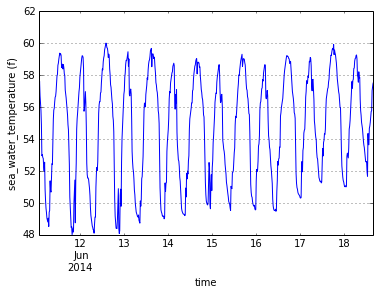

In [22]:
sta_0df[obsprop_name].plot()
ylabel(obsprop_name + ' ('+obsprop['unit']+')');